In [ ]:
#Student Name: Garret Molloy
#Student ID:   9021906

### Project Group: 2.3
-----

# Title: Predicting Diabetic Retinopathy

## Binary Classification & Logistic Regression Model

**Datasource Name:** Diabetic Retinopathy Debrecen Data Set Data Set 
**Website:**         The UCI Machine Learning Repository 
**Datasource:**      http://archive.ics.uci.edu/ml/datasets/Diabetic+Retinopathy+Debrecen+Data+Set#

### Contributions
------
Each Group Member agreed to research a dataset and an algorithm.
We then peer reviewed our code to share our insights from the course and wider knowledge.
Where possible we shared concepts code and advice.

This file was created by:        Garret Molloy
Which included identifying the dataset and chosing the algorithm.

#### Training data
- I resesarched the "The UCI Machine Learning Repository" and identified this dataset

#### Pre-processing
- Inspiration from April Chen https://www.youtube.com/watch?v=V0u6bxQOUJ8&feature=player_embedded used some of her code for checking number of unique categories in features [1]

#### Algorithm training and evaluation
- Abhi gave good advice to try Grit 

#### Visualisation of outputs
- Article: https://lukesingham.com/whos-going-to-leave-next/ used correlation heatmap [2]
- Cathal had a good example of 

## Step 1. Load Dataset

In [293]:
from pandas import read_csv

df = read_csv("messidor_features.csv")

## Information about my Dataset

This dataset contains features extracted from the Messidor image set to **predict whether an image contains signs of diabetic retinopathy** or not. 
All features represent either a detected lesion, a descriptive feature of a anatomical part or an image-level descriptor. 
The underlying method image analysis and feature extraction as well as our classification technique is described in Balint Antal, Andras Hajdu: An ensemble-based system for automatic screening of diabetic retinopathy, Knowledge-Based Systems 60 (April 2014), 20-27. 


### Data Features

#### Attribute Information:
-----


| Field Name | Description | Values |
|-----|-----|-----|
| id | Unique id of the sample | int |
| 0 | Result of **quality assessment** | 0 = bad quality, 1 = sufficient quality |
| 1 |  The **result of pre-screening** |  1 indicates severe retinal abnormality and 0 its lack |
| 2-7 |  The results of **MA detection** | Each feature value stand for the number of MAs found at the confidence levels alpha = 0.5, . . . , 1, respectively |
| 8-15 | Contain the same information as 2-7 for **exudates** | However, as exudates are represented by a set of points rather than the number of pixels constructing the lesions, these features are normalized by dividing the number of lesions with the diameter of the ROI to compensate different image sizes |
| 16 | The euclidean distance of the center of the macula and the center of the optic disc to provide important information regarding the patient's condition. This feature is also normalized with the diameter of the ROI. | Numeric |
| 17 | The diameter of the optic disc | Numeric |
| 18 |  The binary result of the AM/FM-based classification | ? |
| **Class** | __Contains signs of DR__ (Accumulative label for the Messidor classes 1, 2, 3) | 1= contain sign, 0 = no signs of DR|


**Note:**
'Class' is the Feature which indicates we have detected DR (Diabetic Retinopathy).
This outcome is what we want to predict.

## Step 2. Dataset Pre-Processing


## Check Scaling XXXXXXXXXXXXX

In [222]:
# Let's see some of the data
#print( df.head(5))

# Snadbox - remove below XXXXXXXXXXXXX
#df2.loc[startrow:endrow, startcolumn:endcolumn]

print(df.loc[100:115,'18':'18'].join(df.loc[100:115, 'Class']).sort_values(by=['Class']))

     18  Class
103   1      0
105   0      0
107   0      0
110   0      0
111   1      0
112   0      0
115   0      0
100   0      1
101   0      1
102   0      1
104   0      1
106   1      1
108   1      1
109   0      1
113   1      1
114   0      1


We see it is all numeric. So not much room for dummies, or substitution of Categoric or Ordinal Values.

In [230]:
def print_datashape(df):
    datashape = df.shape
    print("Data has", datashape[0], "samples with", datashape[1], "features")

print_datashape(df)

Data has 1151 samples with 21 features


#### Let's Remove Features known to be redundant

In [294]:
# Remove 'id' field as it contributes nothing
df = df.drop('id',1)

print_datashape(df)

Data has 1151 samples with 20 features


#### Check Sample Results
How many samples have DR detected

1    611
0    540
Name: Class, dtype: int64


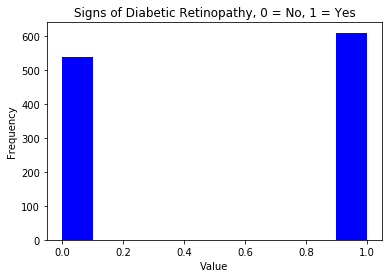

In [220]:
print(df['Class'].value_counts())

import matplotlib.pyplot as plt

def plot_histogram(x):
    plt.hist(x, color="blue")
    plt.title("Signs of Diabetic Retinopathy, 0 = No, 1 = Yes")
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.show()
    
plot_histogram(df['Class'])

#### Check for Categories
Just to confirm there are no categorical features.
Features which have a  low nuber of possibilities
Check the number of unique values per feature

In [156]:
# Decide which categorical variables you want to use in model
# [1] April Chen Method
for col_name in df.columns:
    unique_cat = len(df[col_name].unique())
    print("Feature '{col_name}' has {unique_cat} unique categories".format(col_name=col_name, unique_cat=unique_cat))

Feature 'id' has 1151 unique categories
Feature '0' has 2 unique categories
Feature '1' has 2 unique categories
Feature '2' has 110 unique categories
Feature '3' has 104 unique categories
Feature '4' has 99 unique categories
Feature '5' has 91 unique categories
Feature '6' has 84 unique categories
Feature '7' has 69 unique categories
Feature '8' has 1141 unique categories
Feature '9' has 1141 unique categories
Feature '10' has 1130 unique categories
Feature '11' has 1032 unique categories
Feature '12' has 795 unique categories
Feature '13' has 579 unique categories
Feature '14' has 415 unique categories
Feature '15' has 351 unique categories
Feature '16' has 1132 unique categories
Feature '17' has 1110 unique categories
Feature '18' has 2 unique categories
Feature 'Class' has 2 unique categories


We can see only the 3 binary features we already knew about in our Feature descriptions

#####  Remove Outliers

In [189]:
# Feature '0' is 0 where we had poor quality assessment and is therefore a potentially unusable sample
# Goal to remove bad readings form samples

# First I confirm there is no DR detected when the quality assessment is poor
print("How many Samples detect DR when the quality assessment is poor: ", 
      len(df[(df['0']==0) & (df['Class']==1)]))

How many Samples detect DR when the quality assessment is poor:  0


In [295]:
# No Hits where Quality Assessment == 0
print_datashape(df)

# So we can confidently remove these rows as outliers
print("Drop Poor Samples")
df = df[df['0'] != 0]

# Then we can remove this feature altogether
df = df.drop('0', 1)

print_datashape(df)

Data has 1151 samples with 20 features
Drop Poor Samples
Data has 1147 samples with 19 features


In [299]:
print("How many Samples detect DR when the pre-screening assessment shows a lack of DR: ", 
      len(df[(df['1']==0) & (df['Class']==1)]), "/", len(df[(df['1']==0)]))

How many Samples detect DR when the pre-screening assessment shows a lack of DR:  62 / 94


In [300]:
# Results not zero, in fact a high number false hits from the [pre-screening of 0]
# so we keep these samples, but we can drop the Feature, as it is very Low Variance  94/1100 with poor accuracy
df = df.drop('1', 1)

print_datashape(df)

Data has 1147 samples with 18 features


In [288]:
# Check for missing Values
print(df.apply(lambda x: sum(x.isnull()), axis=0))

2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       0
14       0
15       0
16       0
17       0
18       0
Class    0
dtype: int64


No Missing Data - Unforuntateley nothing to fix!

#### Check Correlation

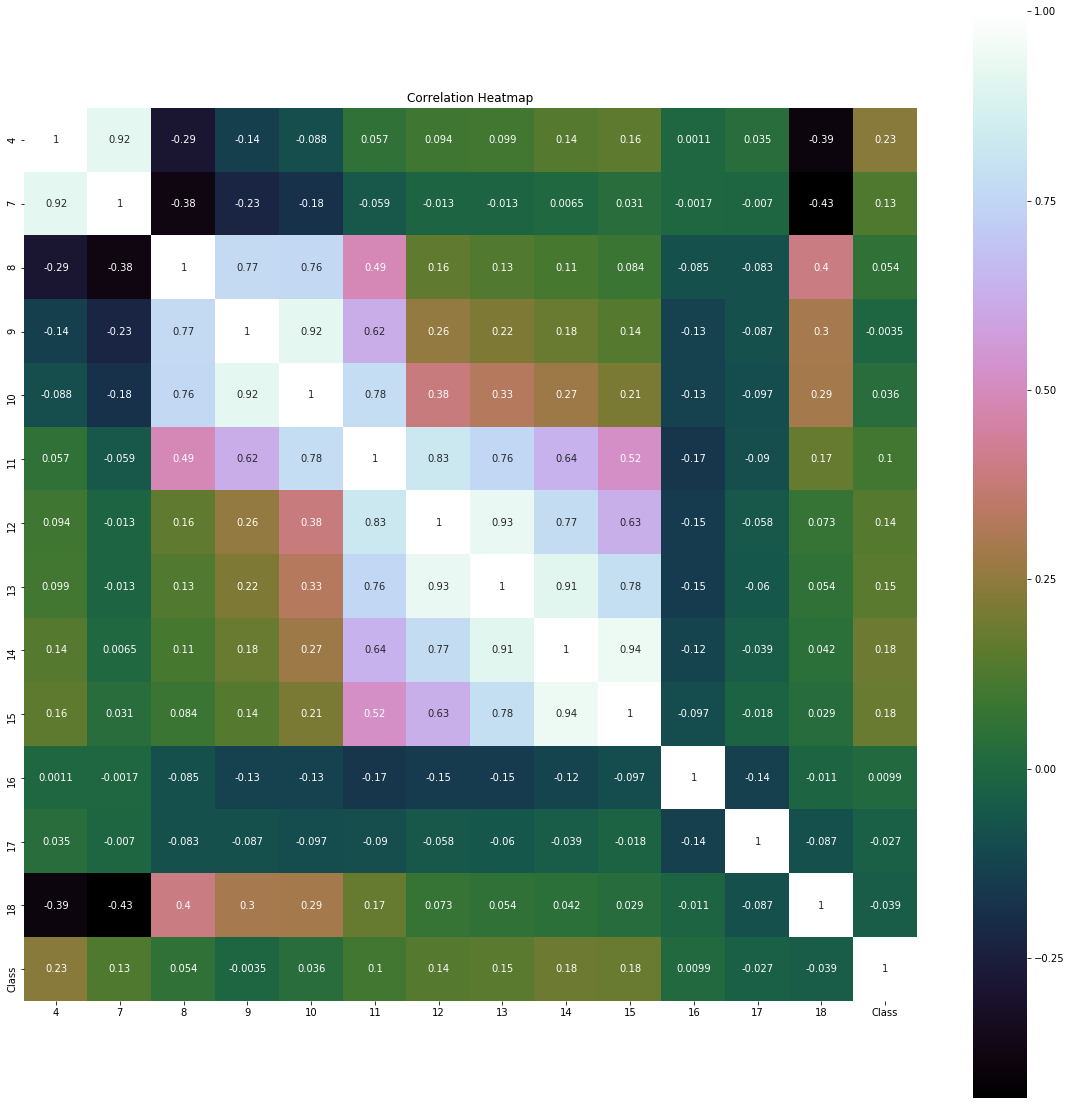

In [266]:
import matplotlib.pyplot as plt
import seaborn as sns  
from sklearn.linear_model import LogisticRegression  
'''from sklearn.ensemble import RandomForestClassifier  
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.naive_bayes import GaussianNB  
from sklearn.model_selection import cross_val_score 
from sklearn import metrics  
from IPython.display import Image  
from pydotplus import graph_from_dot_data  '''

# [2] Article: https://lukesingham.com/whos-going-to-leave-next/

# Useful visualization for Correlation
correlation = df.corr()  
plt.figure(figsize=(20, 20))  
plt.title("Correlation Heatmap")
sns.heatmap(correlation, vmax=1, square=True, annot=True, cmap='cubehelix')

From the Correlation Heatmap we can see Features '2' to '7' are all highly correlated.
This is because this is the countof MAs detcted under finer resolution.
So the numbers decrease with increased resolution requirements.
We could take just the median of these or Feature '4' being the median calculation.

In [227]:
print(df.loc[100:115,'2':'7'].join(df.loc[100:115, 'Class']).sort_values(by=['Class']))

      2   3   4   5   6   7  Class
103  13  13  13  12  12   8      0
105  42  42  41  40  39  32      0
107   1   1   1   1   1   1      0
110  36  36  35  33  27  19      0
111  26  25  25  25  25  17      0
112  53  52  52  52  51  39      0
115   5   5   5   4   4   4      0
100  42  41  40  37  34  22      1
101  41  41  39  37  36  28      1
102  19  19  16  14  10   6      1
104  13  12  11   9   5   4      1
106  47  39  33  23  17  10      1
108  19  19  18  15  12   7      1
109  47  47  45  42  39  27      1
113  49  39  31  23  16  11      1
114  60  58  56  54  49  37      1


       4   7           8          9         10         11        12        13  \
1145  15   8  158.177307  84.865487  51.253664  11.283321  1.857293  0.019520   
191   30   9  168.777787  54.775579  18.557908   2.459469  0.196310  0.097646   
509   11   6  175.634291  10.237137   3.939558   0.447932  0.023468  0.007142   
112   52  39   75.983475  39.166644  15.955050   1.287803  0.093432  0.000000   
931   17   9   68.669165  23.975073   8.867720   1.350667  0.132820  0.032228   

            14        15        16        17  18  Class  
1145  0.006832  0.001952  0.533177  0.104430   1      0  
191   0.037635  0.033566  0.535815  0.097646   1      1  
509   0.002041  0.002041  0.508804  0.101014   1      1  
112   0.000000  0.000000  0.554139  0.118347   0      0  
931   0.005860  0.000977  0.503945  0.107428   1      0  


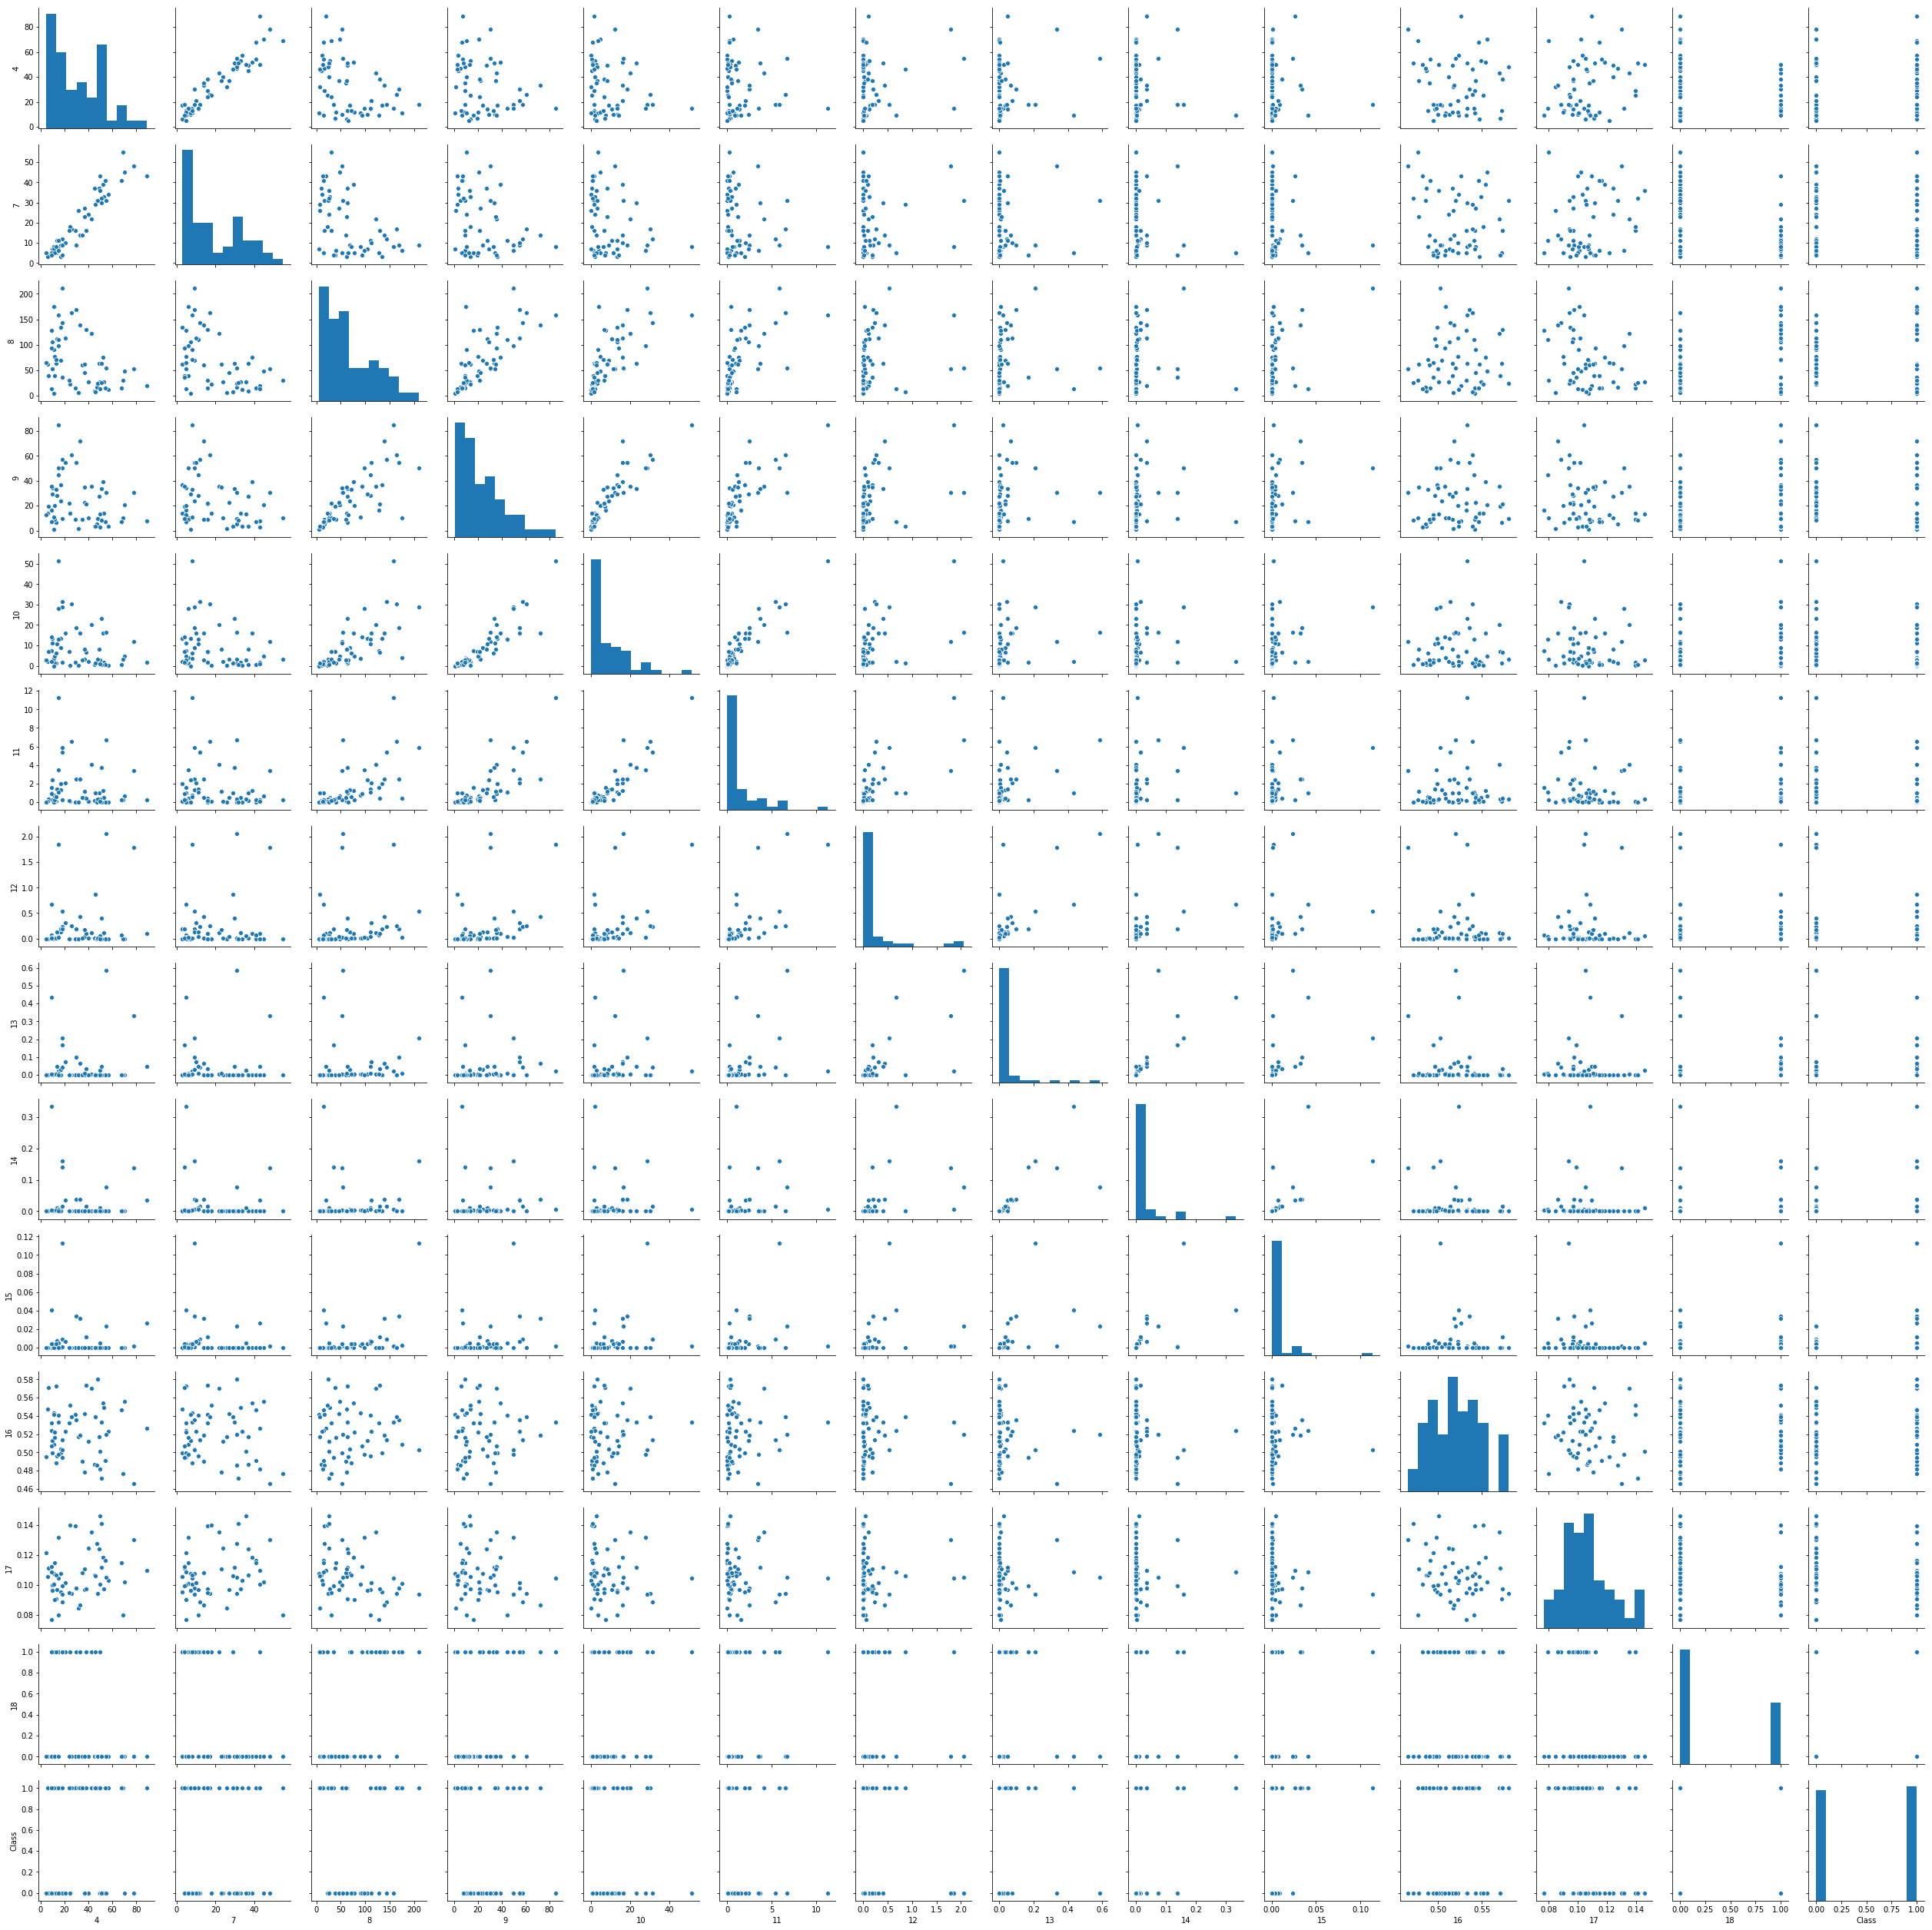

In [268]:
#  [2] graph idea and code from Article
# unfortunately I have too many features

# take a 5% sample as this is computationally expensive
df_sample = df.sample(frac=0.05)  
print(df_sample.head(5))
# Pairwise plots
pplot = sns.pairplot(df_sample)  
# The highly correllated will demonstrate a linear graph

## Prepare Data for Training & Evaluation

In [289]:
from sklearn.model_selection import train_test_split

# Split Features and Target Classification
X = df.drop('Class', 1)
y = df.Class

# ADD Shuffle -- BIG DIFFERENCE TO PERFORMANCE  XXXXXXXXX


# Use train_test_split in sklearn.cross_validation to split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, shuffle=True, random_state=1)

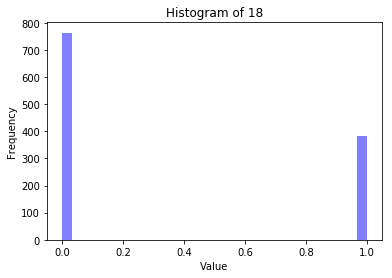

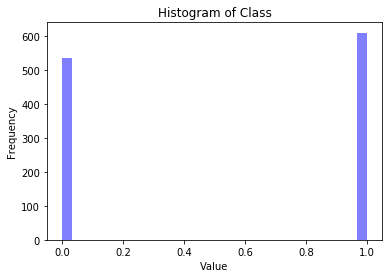

16     36
12     29
17     27
19     26
15     24
11     22
49     21
48     21
41     21
24     21
13     21
20     20
14     20
8      19
21     18
25     18
9      18
44     18
53     18
10     18
56     17
5      17
18     17
34     16
52     16
60     16
37     16
43     16
64     15
50     15
       ..
77      4
87      4
68      4
78      3
91      3
105     3
32      3
80      3
102     3
86      3
103     2
88      2
84      2
95      2
114     2
107     2
99      2
82      2
92      2
137     1
126     1
141     1
93      1
101     1
98      1
96      1
94      1
147     1
83      1
151     1
Name: 2, Length: 110, dtype: int64
1    611
0    536
Name: Class, dtype: int64


In [144]:
import matplotlib.pyplot as plt

def plot_histogram(x):
    plt.hist(x, color="blue", alpha=0.5, bins=30)
    plt.title("Histogram of {}".format(x.name))
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.show()
    
plot_histogram(X['18'])
plot_histogram(y)
# print(X['16'].value_counts())

def plot(z):
    plt.title("Plot of Values of {}".format(z.name))
    plt.plot(z)
    plt.show()
    
# df = df[df.line_race != 0]
# df.loc[(df['age'] == 21) & df['favorite_color'].isin(array)]
print( df['2'].value_counts())
print( y.value_counts())

### PCA Feature Reduction

In [281]:
from sklearn.decomposition import PCA
import pandas as pd

pca = PCA(n_components=10)
X_pca = pd.DataFrame(pca.fit_transform(X))

print(X_pca.head(5))

## CHECK PCA Notebook Abhi - analyse all ... eigenvectors... 

            0          1          2         3         4         5         6  \
0 -574.934366  10.531245 -34.793460  1.890353 -0.489611  0.323446 -0.109261   
1 -573.819008  18.050788 -29.912178  3.449034  2.047851 -4.056269  1.760826   
2 -573.328202 -21.577458  42.524350  7.485789  0.320220  2.049081  0.424116   
3 -572.491509 -30.864985  22.314418  3.671205 -0.845085  2.941871 -0.544917   
4 -571.715557 -43.488653  -7.552933  0.132374 -2.497964 -0.057152  0.458159   

          7         8         9  
0  0.230179  0.457804  0.876081  
1  1.781073  0.874861  1.199405  
2 -2.718288  1.121384 -0.167277  
3 -2.828154  1.227417 -1.201440  
4 -2.670275 -0.239652  0.940421  


In [290]:
import sklearn.feature_selection
from sklearn.model_selection import train_test_split

# Use train_test_split in sklearn.cross_validation to split data into train and test sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)


select = sklearn.feature_selection.SelectKBest(k=12)
selected_features = select.fit(X_train, y_train)
indices_selected = selected_features.get_support(indices=True)
colnames_selected = [X.columns[i] for i in indices_selected]

X_train_selected = X_train[colnames_selected]
X_test_selected = X_test[colnames_selected]

# Function to build model and find model performance
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

def find_model_perf(X_train, y_train, X_test, y_test, model=1):
    model = LogisticRegression()
    
    ##  ADD different parameters in LogRegression
    
    ## Cross Validation - rerun fit model  (reduce under/overfitting)
    
    ## Pipeline 
    
    ## Gridsearch 
    
    ## GridSearch CV
    
    model.fit(X_train, y_train)
    
    y_hat = [x[1] for x in model.predict_proba(X_test)]
    auc = roc_auc_score(y_test, y_hat)
    
    return auc




In [291]:
print(indices_selected)

[ 0  1  2  3  4  5  9 10 11 12 13 15]


In [292]:
# Find performance of model using preprocessed data
auc_processed = find_model_perf(X_train_selected, y_train, X_test_selected, y_test)
print(auc_processed)

auc_processed = find_model_perf(X_train, y_train, X_test, y_test)
print(auc_processed)

0.844465058750773
0.8451865594722737


D:\Python\Miniconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Python\Miniconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [10]:
import sklearn.feature_selection
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# Use train_test_split in sklearn.cross_validation to split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

clf = svm.SVC(gamma='scale')
clf.fit(X, y)  
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
#print(clf.predict(X_test[0]))

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Data is not great for showing off pre-prcessing
As it is already all numeric and has no missing data
There may be a few outliers I could remove

But would prefer something more challenging

k=10
0.8149624765478425
0.8168721522380059

k=12
0.8090659340659341
0.8168721522380059



### Look at ROC Curve from Ahbi

### Confusion MAtrix

### Scaled Data  min/max 

###